In [1]:
import sys

import seaborn as sns
sns.set("talk")

sys.path.append("..")
import cardio.batchflow as bf
from cardio import EcgDataset

In [2]:
eds = EcgDataset(path="../cardio/tests/data/*.xml", no_ext=True, sort=True)
eds.indices

array(['sample'], dtype='<U31')

In [3]:
template_load_ppl = (
    bf.Pipeline()
      .load(components=["signal", "meta"], fmt="xml", xml_type="schiller")
      .convert_units("mV")
)

In [4]:
batch = (eds >> template_load_ppl).next_batch(len(eds), shuffle=False)

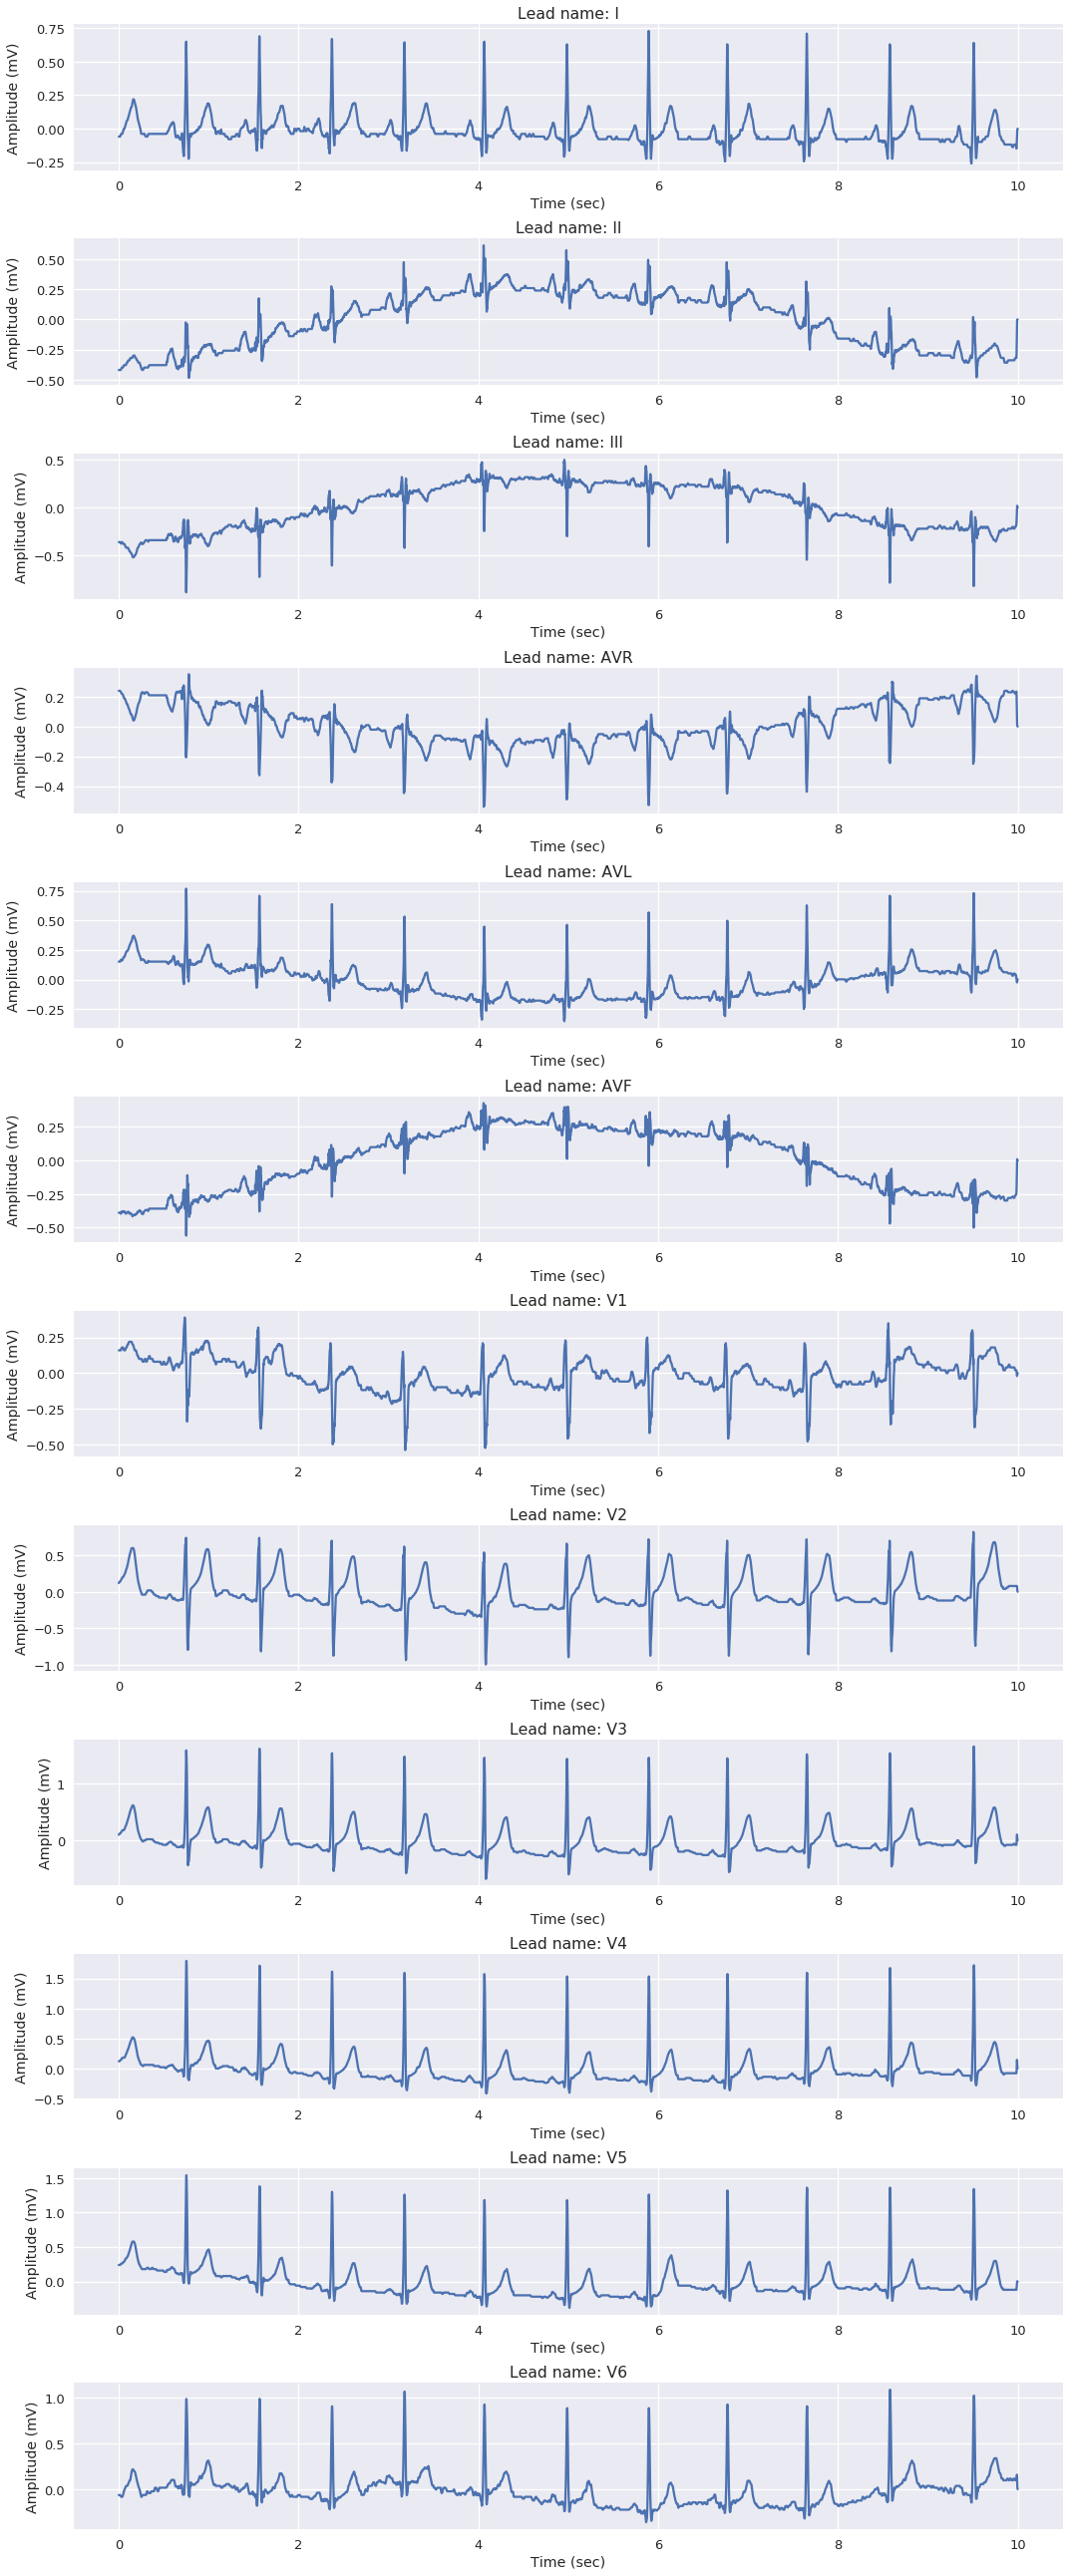

In [5]:
batch.show_ecg(subplot_size=(15, 3))